<a href="https://colab.research.google.com/github/ziriael-absten/Exploratory-data-analysis-for-online-store/blob/main/Exploratory_data_analysis_for_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Mate_Python_Folder
countries = pd.read_csv("countries.csv")
products = pd.read_csv("products.csv")
events = pd.read_csv("events.csv")
countries
products
events

Mounted at /content/drive
/content/drive/MyDrive/Mate_Python_Folder


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79
...,...,...,...,...,...,...,...,...,...,...
1325,994504153,1/10/2017,1/13/2017,M,SWE,4594,Online,4734.0,9.33,6.92
1326,994978797,12/5/2014,1/2/2015,H,ITA,1270,Offline,5192.0,47.45,31.79
1327,996754205,9/20/2010,9/22/2010,L,RUS,7331,Offline,574.0,255.28,159.42
1328,998043382,6/15/2010,7/3/2010,H,MLT,8293,Online,2070.0,437.20,263.33


У датасеті міститься інформація щодо продажів продукції компанії, яка працює на світовому ринку і продає товари у звичайних магазинах та інтернет-магазинах. Датасет складається з трьох таблиць:

    events.csv — продажі за декілька років;
    products.csv — категорії товарів та їх коди;
    countries.csv — країни, регіони та їх коди.


In [ ]:
print(f"{countries.isna().sum() / countries.shape[0] * 100} \n\n")
print(f"{products.isna().sum() / products.shape[0] * 100} \n\n")
print(events.isna().sum() / events.shape[0] * 100)

countries = countries.dropna()
events = events.dropna(subset=["Country Code"])
events = events.dropna(subset=["Units Sold"])

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64 


id           0.0
item_type    0.0
dtype: float64 


Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


В таблиці countries ми мали 0.4% пропущених даних в колонках region та sub-region, оскільки рядки в яких були пропуски мали дані по регіону Антарктика, а компанія не має продажів в цьому регіоні, то доцільно було видалити дані цього рядка.

Також в таблиці events були пропуски в колонках Country Code - 6.16% та Units Sold - 0.16%. Оскільки немає можливості відновити дані в колонці з кодом країни, її теж доцільно було видалити. Рядки з пропусками в колонці Units Sold теж було вирішено видалити, щоб не спотворювати дані для аналізу.

In [ ]:
events.info()
events["Order Date"] = pd.to_datetime(events["Order Date"], format="%m/%d/%Y")
events["Ship Date"] = pd.to_datetime(events["Ship Date"], format="%m/%d/%Y")

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1246 non-null   int64         
 1   Order Date      1246 non-null   datetime64[ns]
 2   Ship Date       1246 non-null   datetime64[ns]
 3   Order Priority  1246 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1246 non-null   int64         
 6   Sales Channel   1246 non-null   object        
 7   Units Sold      1246 non-null   float64       
 8   Unit Price      1246 non-null   float64       
 9   Unit Cost       1246 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 107.1+ KB


Для колонок Order Date та Ship Date було змінено тип з object на datetime64.
Дублікати та аномалії не виявлено.

In [ ]:
total_df = pd.merge(events, countries, left_on="Country Code", right_on="alpha-3", how="inner")
total_df = pd.merge(total_df, products, left_on="Product ID", right_on="id", how="inner")
total_df = total_df.drop(["alpha-2", "alpha-3", "id"], axis=1)
total_df = total_df.rename(columns={"name": 'country_name'})
total_df.columns = total_df.columns.str.lower()
total_df["sales channel"] = total_df["sales channel"].str.lower()
total_df

,order id,order date,ship date,order priority,country code,product id,sales channel,units sold,unit price,unit cost,country_name,region,sub-region,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,994504153,2017-01-10,2017-01-13,M,SWE,4594,online,4734.0,9.33,6.92,Sweden,Europe,Northern Europe,Fruits
1242,994978797,2014-12-05,2015-01-02,H,ITA,1270,offline,5192.0,47.45,31.79,Italy,Europe,Southern Europe,Beverages
1243,996754205,2010-09-20,2010-09-22,L,RUS,7331,offline,574.0,255.28,159.42,Russia,Europe,Eastern Europe,Baby Food
1244,998043382,2010-06-15,2010-07-03,H,MLT,8293,online,2070.0,437.20,263.33,Malta,Europe,Southern Europe,Cosmetics


Об'єднання всіх таблиць та очищення від зайвих колонок.

In [ ]:
total_df["profit"] = (total_df["unit price"] - total_df["unit cost"]) * total_df["units sold"]
total_profit = total_df["profit"].sum()
print(f"Загальна кількість замовлень компанії: {total_df['order id'].count()}")
print(f"Загальний прибуток компанії: ${total_profit}")
print(f"Загальна кількість охоплених країн: {total_df['country code'].nunique()}")
total_df

Загальна кількість замовлень компанії: 1246
Загальний прибуток компанії: $473709035.06
Загальна кількість охоплених країн: 45


,order id,order date,ship date,order priority,country code,product id,sales channel,units sold,unit price,unit cost,country_name,region,sub-region,item_type,profit
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,57583.50
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,176559.87
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,85998.24
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,119767.68
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,280275.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,994504153,2017-01-10,2017-01-13,M,SWE,4594,online,4734.0,9.33,6.92,Sweden,Europe,Northern Europe,Fruits,11408.94
1242,994978797,2014-12-05,2015-01-02,H,ITA,1270,offline,5192.0,47.45,31.79,Italy,Europe,Southern Europe,Beverages,81306.72
1243,996754205,2010-09-20,2010-09-22,L,RUS,7331,offline,574.0,255.28,159.42,Russia,Europe,Eastern Europe,Baby Food,55023.64
1244,998043382,2010-06-15,2010-07-03,H,MLT,8293,online,2070.0,437.20,263.33,Malta,Europe,Southern Europe,Cosmetics,359910.90


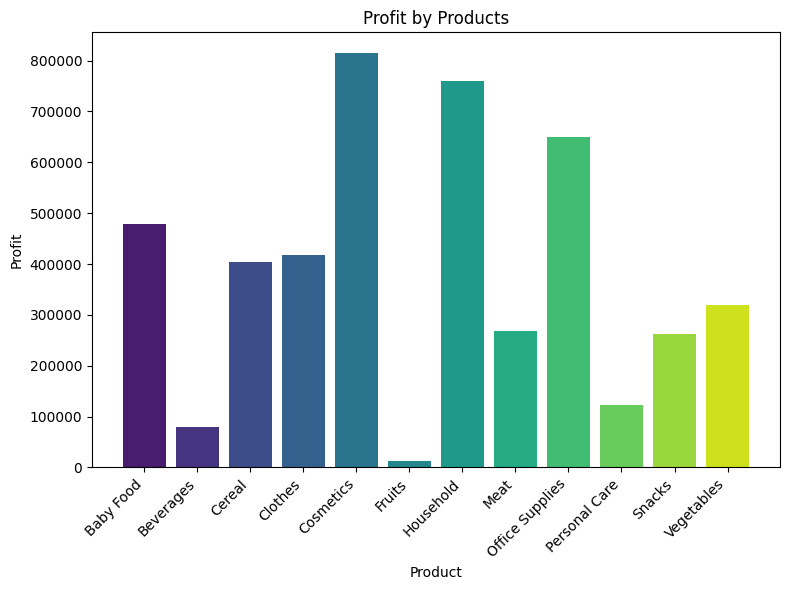

In [ ]:
profit_by_categories = total_df.groupby("item_type")["profit"].mean()
profit_by_categories
colors = sns.color_palette("viridis", len(profit_by_categories))

plt.figure(figsize=(8, 6))
plt.bar(profit_by_categories.index, profit_by_categories.values, color=colors)
plt.xlabel("Product")
plt.ylabel("Profit")
plt.title("Profit by Products")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Найбільший прибуток компанії приносять категорії: Cosmetics, Household та Office Supplies. Найменший прибуток: Fruits, Beverages та Personal Care.

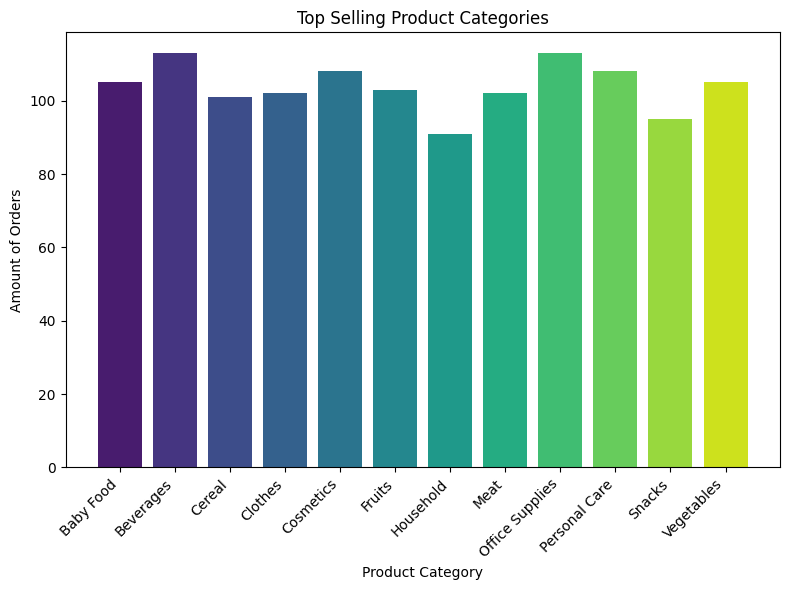

In [ ]:
top_categories = total_df.groupby("item_type")["order id"].count()
colors = sns.color_palette("viridis", len(top_categories))

plt.figure(figsize=(8, 6))
plt.bar(top_categories.index, top_categories.values, color=colors)
plt.xlabel("Product Category")
plt.ylabel("Amount of Orders")
plt.title("Top Selling Product Categories")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



Різниця в популярності товарів дуже незначна, з невеликою перевагою лідирують категорії: Beverages та Office Supplies, а найменш популярною є категорія Household

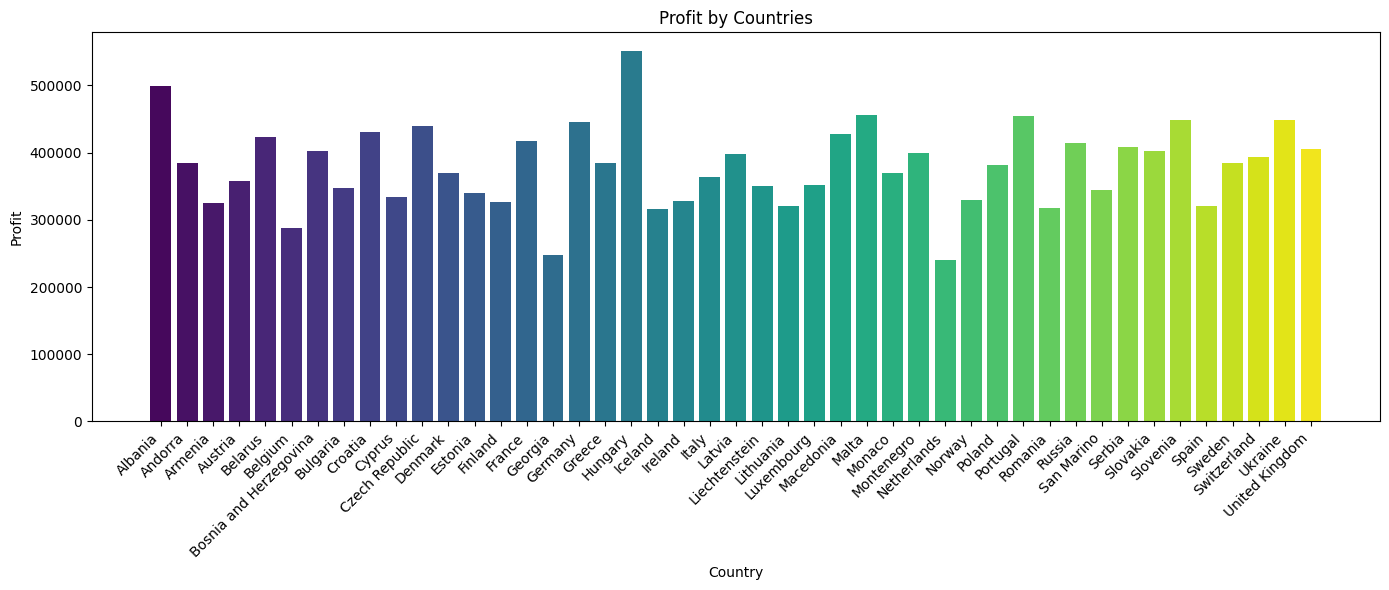

In [ ]:
profit_by_countries = total_df.groupby("country_name")["profit"].mean()
profit_by_countries
colors = sns.color_palette("viridis", len(profit_by_countries))

plt.figure(figsize=(14, 6))
plt.bar(profit_by_countries.index, profit_by_countries.values, color=colors)
plt.xlabel("Country")
plt.ylabel("Profit")
plt.title("Profit by Countries")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Найбільший прибуток компанії приносять Угорщина, Албанія та Португалія, а найменший Грузія та Нідерланди.

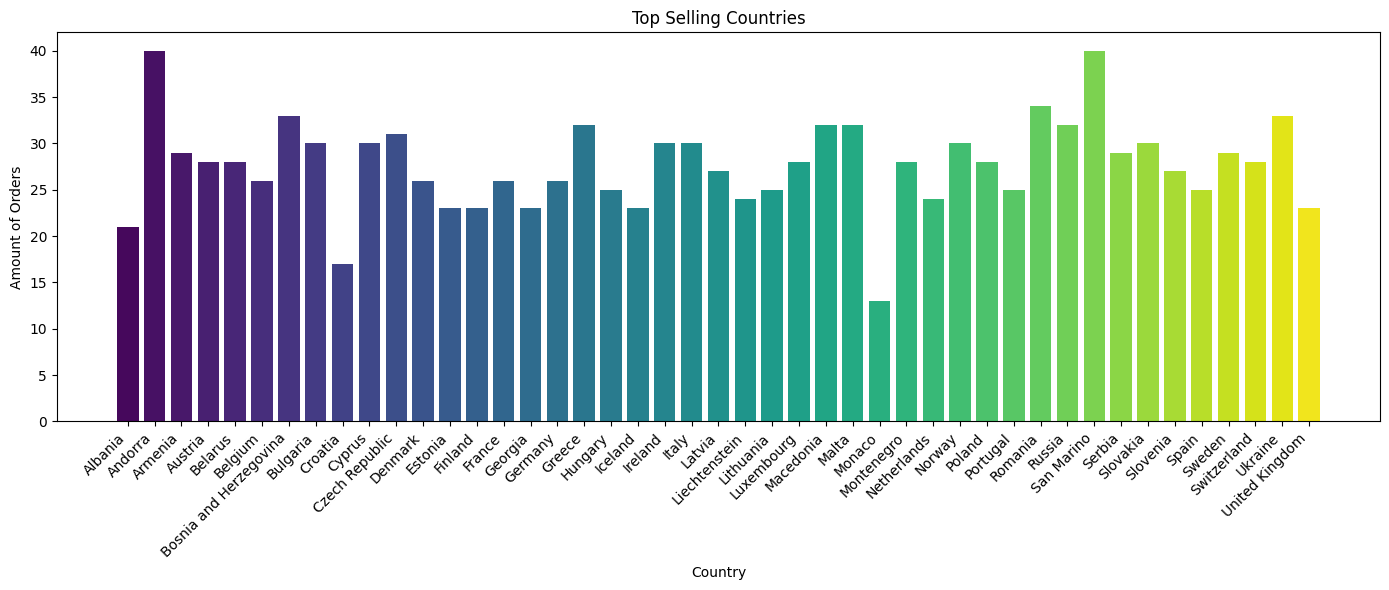

In [ ]:
top_countries = total_df.groupby("country_name")["order id"].count()
colors = sns.color_palette("viridis", len(top_countries))

plt.figure(figsize=(14, 6))
plt.bar(top_countries.index, top_countries.values, color=colors)
plt.xlabel("Country")
plt.ylabel("Amount of Orders")
plt.title("Top Selling Countries")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Лідерами по кількості замовлень є Андора та Сан-Марино, найменша кількість замовлень в Монако.

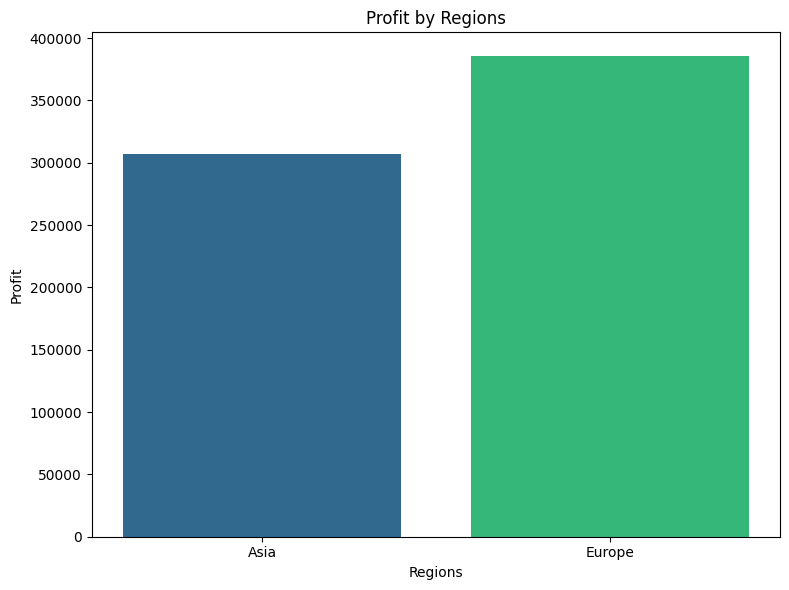

In [ ]:
profit_by_regions = total_df.groupby("region")["profit"].mean()
profit_by_regions
colors = sns.color_palette("viridis", len(profit_by_regions))

plt.figure(figsize=(8, 6))
plt.bar(profit_by_regions.index, profit_by_regions.values, color=colors)
plt.xlabel("Regions")
plt.ylabel("Profit")
plt.title("Profit by Regions")
plt.tight_layout()
plt.show()

Більший прибуток по регіонам приносить Європа

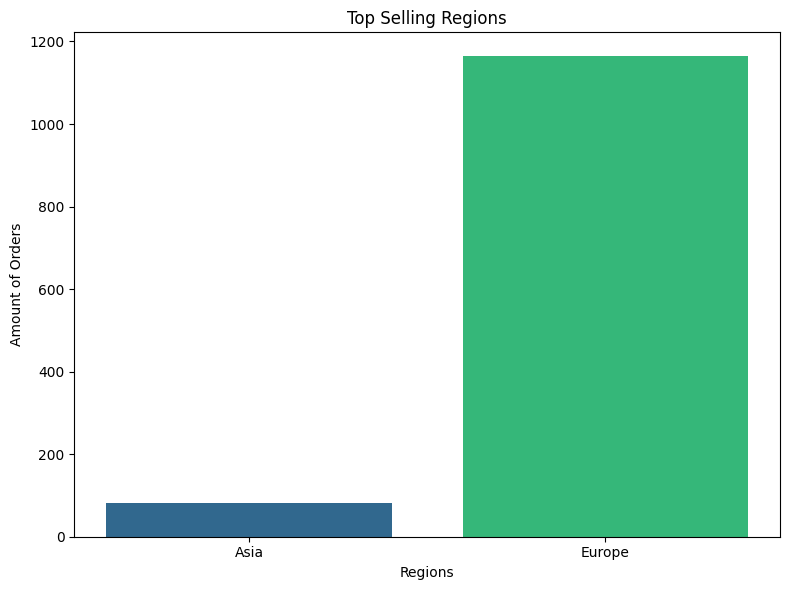

In [ ]:
top_regions = total_df.groupby("region")["order id"].count()
colors = sns.color_palette("viridis", len(top_regions))

plt.figure(figsize=(8, 6))
plt.bar(top_regions.index, top_regions.values, color=colors)
plt.xlabel("Regions")
plt.ylabel("Amount of Orders")
plt.title("Top Selling Regions")
plt.tight_layout()
plt.show()

Значно більша кількість замовлень приходиться на Європу

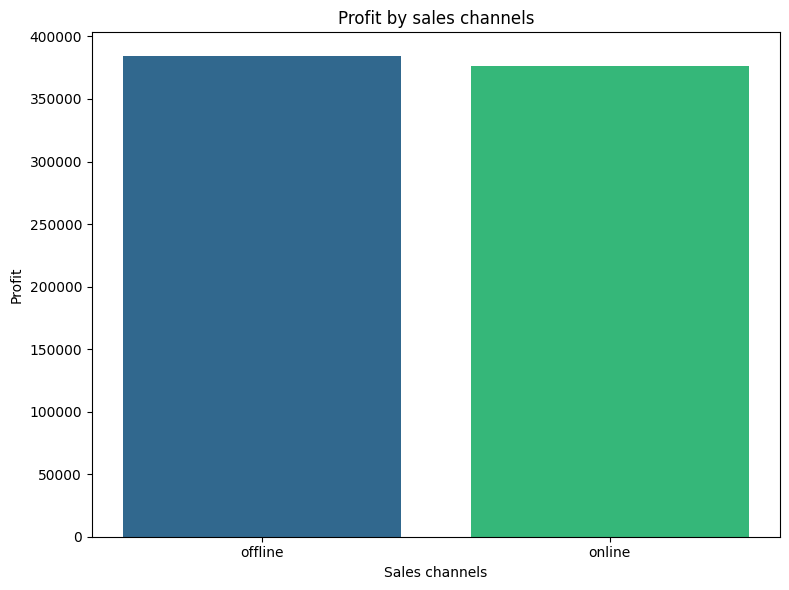

In [ ]:
profit_by_channels = total_df.groupby("sales channel")["profit"].mean()
colors = sns.color_palette("viridis", len(profit_by_channels))

plt.figure(figsize=(8, 6))
plt.bar(profit_by_channels.index, profit_by_channels.values, color=colors)
plt.xlabel("Sales channels")
plt.ylabel("Profit")
plt.title("Profit by sales channels")
plt.tight_layout()
plt.show()

Прибуток з обох каналів продажу майже однаковий.

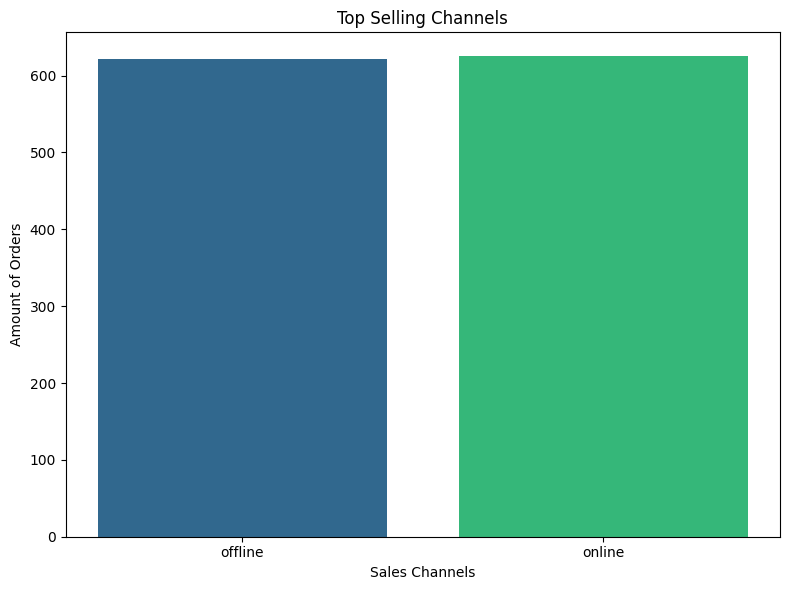

In [ ]:
top_channels = total_df.groupby("sales channel")["order id"].count()
colors = sns.color_palette("viridis", len(top_channels))

plt.figure(figsize=(8, 6))
plt.bar(top_channels.index, top_channels.values, color=colors)
plt.xlabel("Sales Channels")
plt.ylabel("Amount of Orders")
plt.title("Top Selling Channels")
plt.tight_layout()
plt.show()

Кількість замовлень по каналам продажу також майже однакова

In [ ]:
total_df["days"] = (total_df["ship date"] - total_df["order date"]).dt.days
total_df

,order id,order date,ship date,order priority,country code,product id,sales channel,units sold,unit price,unit cost,country_name,region,sub-region,item_type,profit,days
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,57583.50,10
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,176559.87,0
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,85998.24,31
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,119767.68,38
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,280275.00,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,994504153,2017-01-10,2017-01-13,M,SWE,4594,online,4734.0,9.33,6.92,Sweden,Europe,Northern Europe,Fruits,11408.94,3
1242,994978797,2014-12-05,2015-01-02,H,ITA,1270,offline,5192.0,47.45,31.79,Italy,Europe,Southern Europe,Beverages,81306.72,28
1243,996754205,2010-09-20,2010-09-22,L,RUS,7331,offline,574.0,255.28,159.42,Russia,Europe,Eastern Europe,Baby Food,55023.64,2
1244,998043382,2010-06-15,2010-07-03,H,MLT,8293,online,2070.0,437.20,263.33,Malta,Europe,Southern Europe,Cosmetics,359910.90,18


Визначаємо інтервал часу між замовленням та його відвантаженням

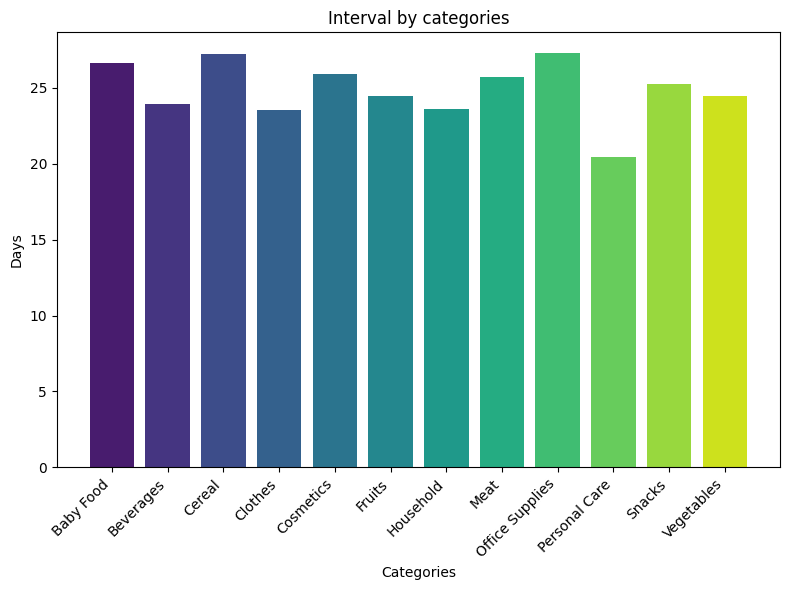

In [ ]:
interval_by_categories = total_df.groupby("item_type")["days"].mean()
colors = sns.color_palette("viridis", len(interval_by_categories))

plt.figure(figsize=(8, 6))
plt.bar(interval_by_categories.index, interval_by_categories.values, color=colors)
plt.xlabel("Categories")
plt.ylabel("Days")
plt.title("Interval by categories")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Найбільше часу витрачається на доставку категорій: Office Supplies, Cereal  та Baby Food, а найменше на категорію Personal Care

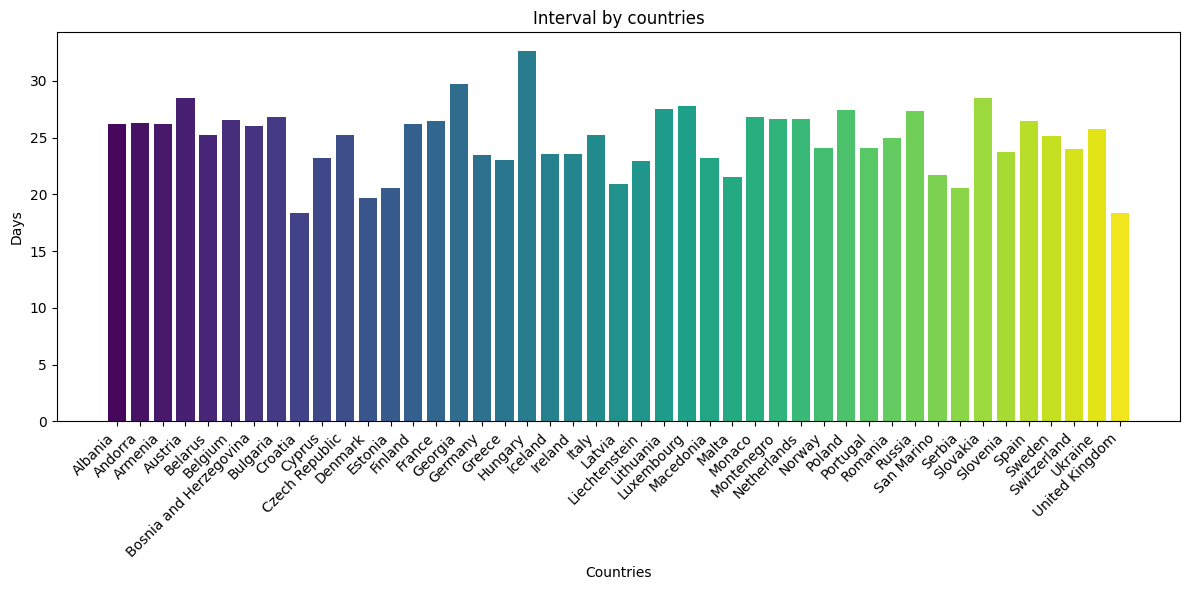

In [ ]:
interval_by_countries = total_df.groupby("country_name")["days"].mean()
colors = sns.color_palette("viridis", len(interval_by_countries))

plt.figure(figsize=(12, 6))
plt.bar(interval_by_countries.index, interval_by_countries.values, color=colors)
plt.xlabel("Countries")
plt.ylabel("Days")
plt.title("Interval by countries")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Найдовше замовлення доставляється в Угорщину, Австрію та Грузію, а найшвидше в Англію та Хорватію

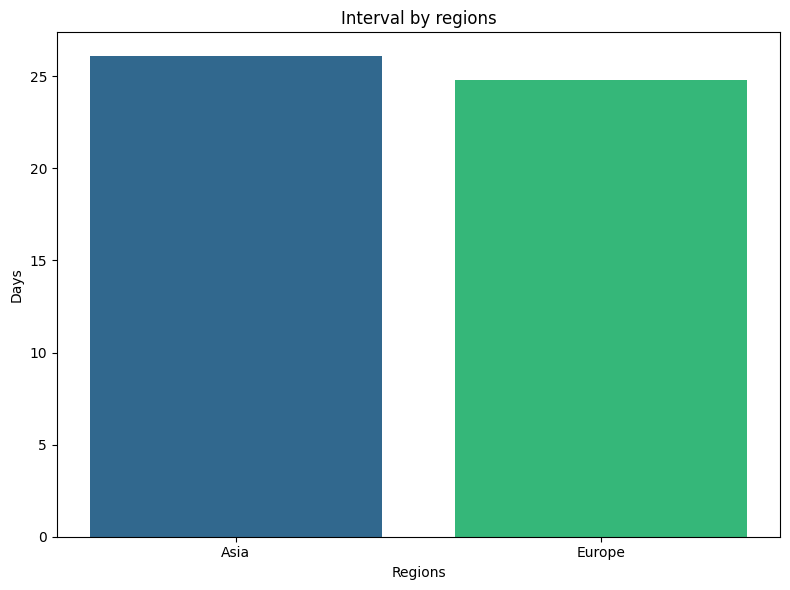

In [ ]:
interval_by_regions = total_df.groupby("region")["days"].mean()
colors = sns.color_palette("viridis", len(interval_by_regions))

plt.figure(figsize=(8, 6))
plt.bar(interval_by_regions.index, interval_by_regions.values, color=colors)
plt.xlabel("Regions")
plt.ylabel("Days")
plt.title("Interval by regions")
plt.tight_layout()
plt.show()

Швидкість доставки товару по регіонам в середньому однакова

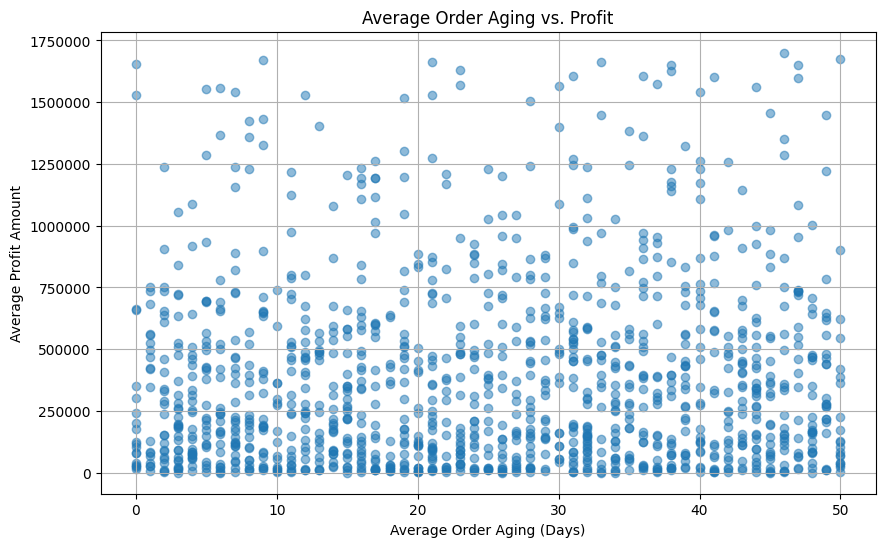

In [ ]:
avg_order_aging = total_df.groupby("order id")["days"].mean()
avg_order_aging_profit = total_df.groupby("order id")["profit"].mean()
avg_order_aging_profit
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.scatter(avg_order_aging, avg_order_aging_profit, alpha=0.5)
plt.xlabel("Average Order Aging (Days)")
plt.ylabel("Average Profit Amount")
plt.title("Average Order Aging vs. Profit")
plt.grid(True)
plt.show()

Значної кореляції між прибутком і періодом доставки не виявлено, що свідчить про те, що час доставки в межах цього періоду не є суттєвим фактором для формування прибутку.

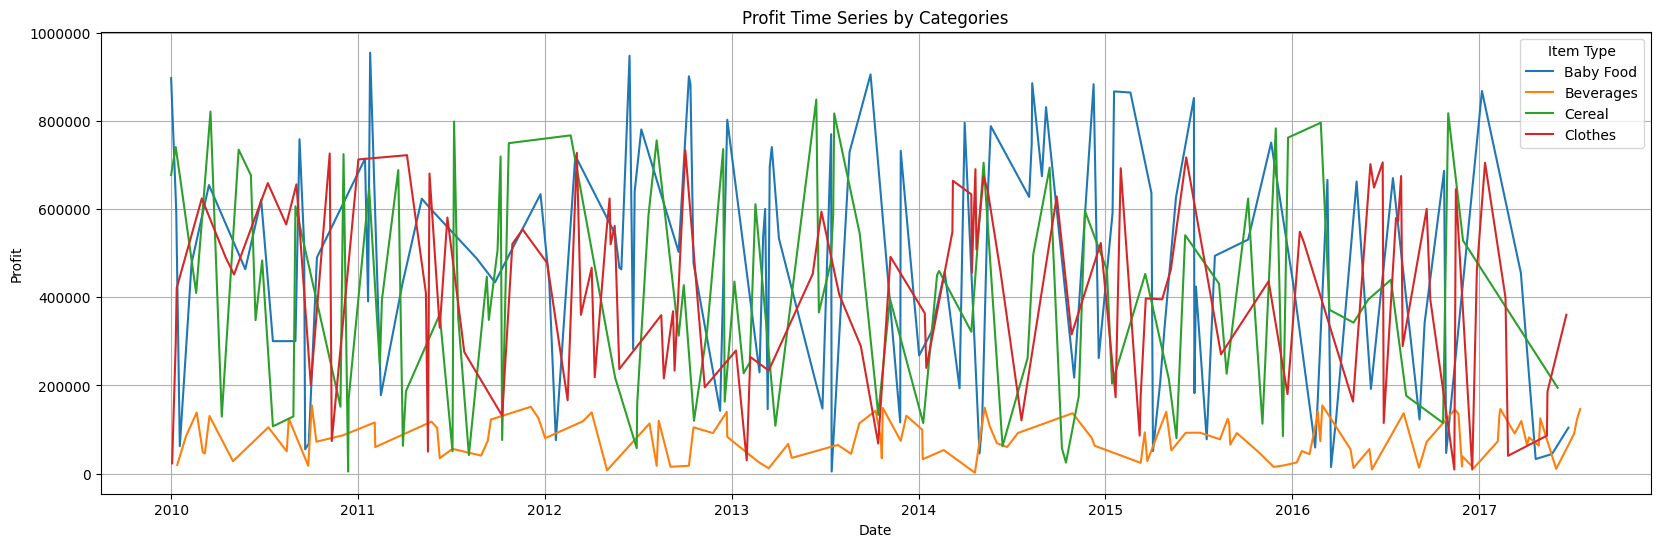

In [ ]:
time_categories_data = (
    total_df.groupby(["item_type", "order date"])["profit"].mean().reset_index()
)
categories_to_include = ["Baby Food", "Beverages", "Cereal", "Clothes"]
filtered_categories_data = time_categories_data[time_categories_data["item_type"].isin(categories_to_include)]
plt.figure(figsize=(20, 6))
plt.ticklabel_format(style='plain')
for category in categories_to_include:
  category_data = filtered_categories_data[filtered_categories_data["item_type"] == category]
  plt.plot(category_data["order date"], category_data["profit"], label=category)
plt.xlabel("Date")
plt.ylabel("Profit")
plt.title("Profit Time Series by Categories")
plt.legend(title="Item Type")
plt.grid(True)
plt.show()



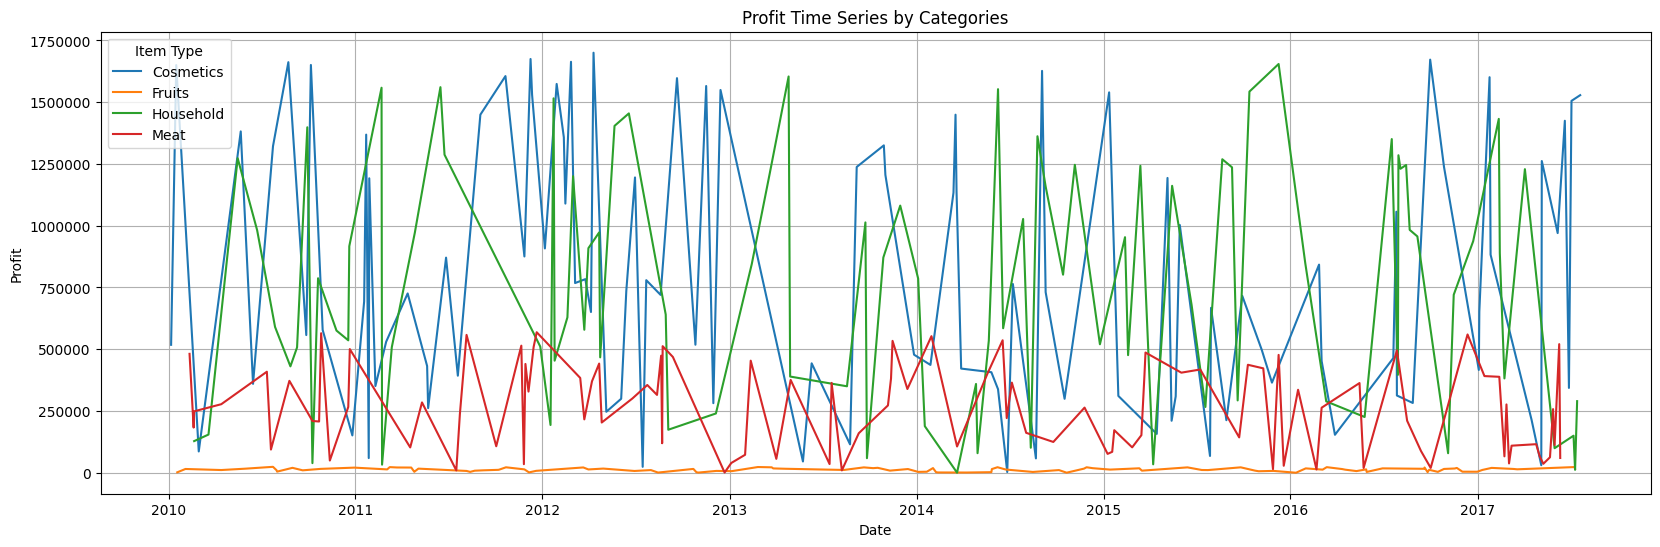

In [ ]:
time_categories_data = (
    total_df.groupby(["item_type", "order date"])["profit"].mean().reset_index()
)
categories_to_include = ["Cosmetics", "Fruits", "Household", "Meat"]
filtered_categories_data = time_categories_data[time_categories_data["item_type"].isin(categories_to_include)]
plt.figure(figsize=(20, 6))
plt.ticklabel_format(style='plain')
for category in categories_to_include:
  category_data = filtered_categories_data[filtered_categories_data["item_type"] == category]
  plt.plot(category_data["order date"], category_data["profit"], label=category)
plt.xlabel("Date")
plt.ylabel("Profit")
plt.title("Profit Time Series by Categories")
plt.legend(title="Item Type")
plt.grid(True)
plt.show()

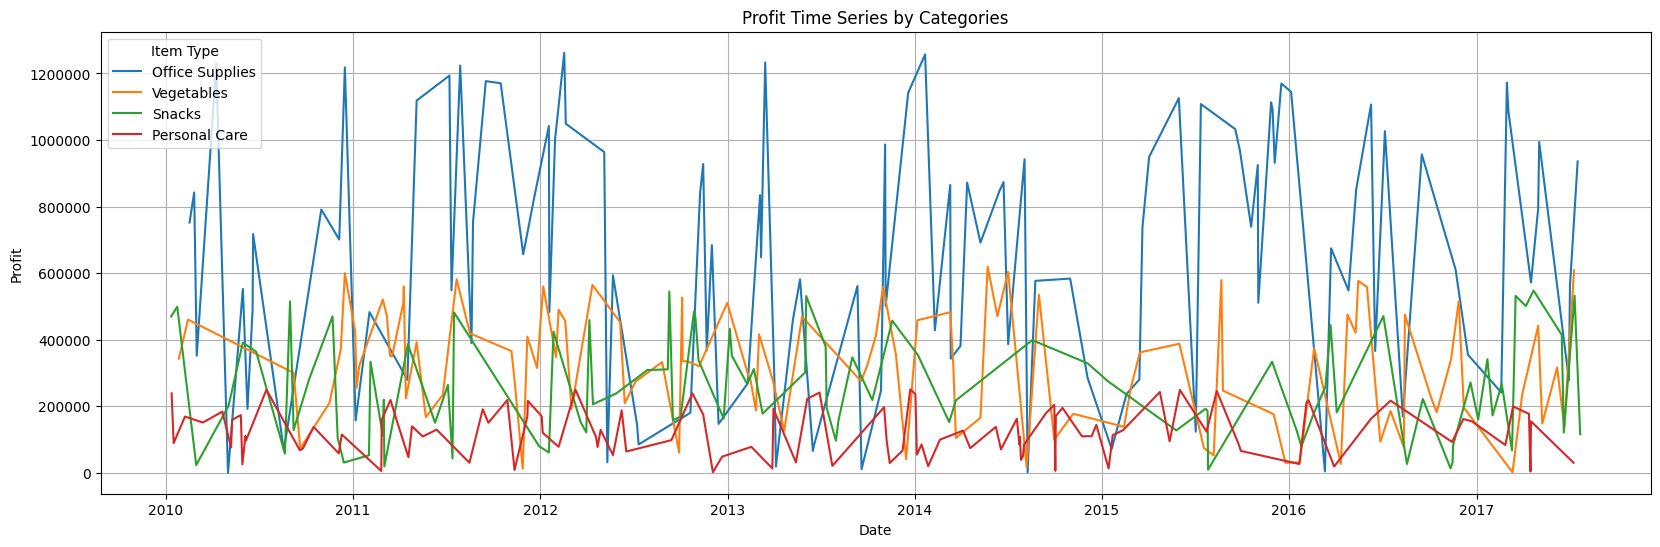

In [ ]:
time_categories_data = (
    total_df.groupby(["item_type", "order date"])["profit"].mean().reset_index()
)
categories_to_include = ["Office Supplies", "Vegetables", "Snacks", "Personal Care"]
filtered_categories_data = time_categories_data[time_categories_data["item_type"].isin(categories_to_include)]
plt.figure(figsize=(20, 6))
plt.ticklabel_format(style='plain')
for category in categories_to_include:
  category_data = filtered_categories_data[filtered_categories_data["item_type"] == category]
  plt.plot(category_data["order date"], category_data["profit"], label=category)
plt.xlabel("Date")
plt.ylabel("Profit")
plt.title("Profit Time Series by Categories")
plt.legend(title="Item Type")
plt.grid(True)
plt.show()

Здебільшого розподіл значень прибутку по категоріям дуже нерівномірний, особливо у категорій лідерів за прибутком

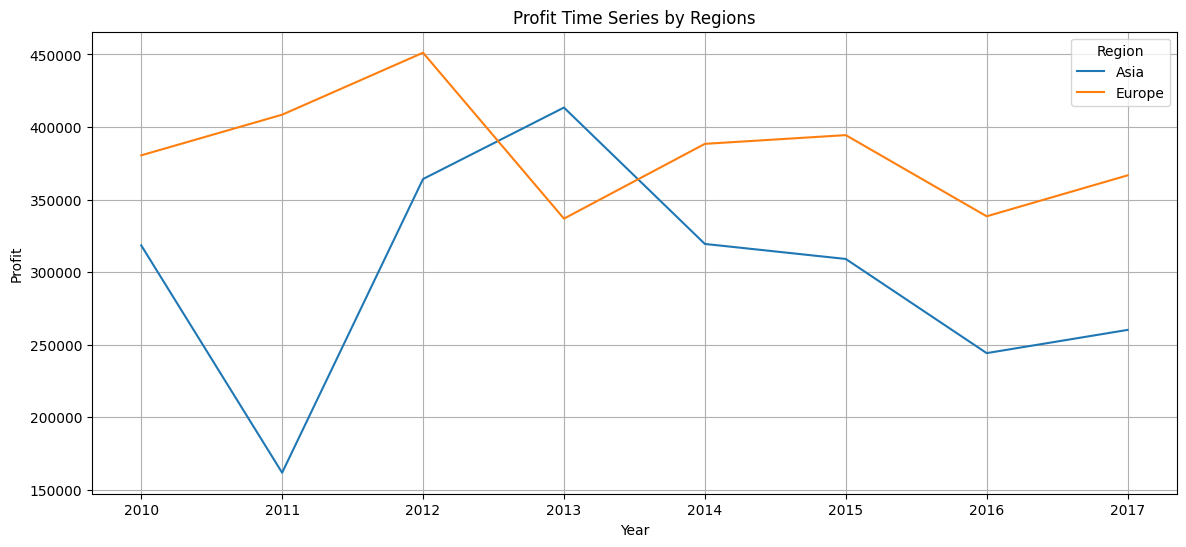

In [ ]:
total_df["year"] = total_df["order date"].dt.year
time_regions_data = ( total_df.groupby(["region", "year"])["profit"].mean().reset_index() )
plt.figure(figsize=(14, 6))
plt.ticklabel_format(style='plain')
regions = time_regions_data["region"].unique()
for region in regions:
  regions_data = time_regions_data[time_regions_data["region"] == region]
  plt.plot(regions_data["year"], regions_data["profit"], label=region)
plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Profit Time Series by Regions")
plt.legend(title="Region")
plt.grid(True)
plt.show()

На графіку можна побачити, що прибутки в розрізі часу по Європі більш стабільні та високі, ніж по Азії

In [ ]:
total_df["day_of_week"] = total_df["order date"].dt.day_name()
total_df

,order id,order date,ship date,order priority,country code,product id,sales channel,units sold,unit price,unit cost,country_name,region,sub-region,item_type,profit,days,day_of_week
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,57583.50,10,Wednesday
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,176559.87,0,Thursday
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,85998.24,31,Saturday
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,119767.68,38,Saturday
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,280275.00,34,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,994504153,2017-01-10,2017-01-13,M,SWE,4594,online,4734.0,9.33,6.92,Sweden,Europe,Northern Europe,Fruits,11408.94,3,Tuesday
1242,994978797,2014-12-05,2015-01-02,H,ITA,1270,offline,5192.0,47.45,31.79,Italy,Europe,Southern Europe,Beverages,81306.72,28,Friday
1243,996754205,2010-09-20,2010-09-22,L,RUS,7331,offline,574.0,255.28,159.42,Russia,Europe,Eastern Europe,Baby Food,55023.64,2,Monday
1244,998043382,2010-06-15,2010-07-03,H,MLT,8293,online,2070.0,437.20,263.33,Malta,Europe,Southern Europe,Cosmetics,359910.90,18,Tuesday


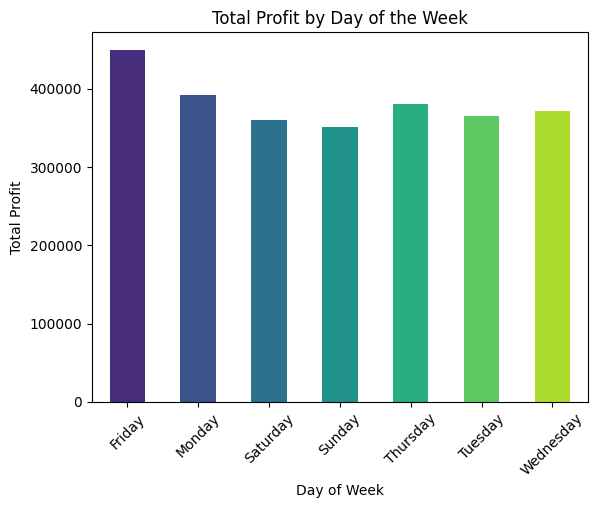

In [ ]:
day_of_week_profit = total_df.groupby("day_of_week")["profit"].mean()
colors = sns.color_palette("viridis", len(day_of_week_profit))
day_of_week_profit.plot(
    kind="bar",
    xlabel="Day of Week",
    ylabel="Total Profit",
    title="Total Profit by Day of the Week",
    color=colors
)
plt.xticks(rotation=45)
plt.show()

Найбільший прибуток компанія отримує в п'ятницю, а найменший в понеділок

##Висновки
Найбільший прибуток компанії приносять категорії: Cosmetics, Household та Office Supplies. Найменший прибуток: Fruits, Beverages та Personal Care.
Різниця в популярності товарів дуже незначна, з невеликою перевагою лідирують категорії: Beverages та Office Supplies, а найменш популярною є категорія Household.

Найбільший прибуток компанії приносять Угорщина, Албанія та Португалія, а найменший Грузія та Нідерланди. Оскільки певні країни приносять значно більше прибутку, компанії слід спрямувати більше ресурсів на ці ринки для максимізації прибутку.
Більший прибуток по регіонам приносить Європа.Значно більша кількість замовлень приходиться на Європу. Це підтверджує стабільний попит і прибутковість ринку Європи.

Прибуток з обох каналів продажу майже однаковий. Кількість замовлень по каналам продажу також майже однакова. Це означає, що компанія ефективно працює через різні канали збуту (онлайн та офлайн).

Найбільше часу витрачається на доставку категорій: Office Supplies, Cereal та Baby Food, а найменше на категорію Personal Care. Найдовше замовлення доставляється в Угорщину, Австрію та Грузію, а найшвидше в Англію та Хорватію. Швидкість доставки товару по регіонам в середньому однакова. Значної кореляції між прибутком і періодом доставки не виявлено, що свідчить про те, що час доставки в межах цього періоду не є суттєвим фактором для формування прибутку.

Здебільшого розподіл значень прибутку по категоріям дуже нерівномірний, особливо у категорій лідерів за прибутком. На графіку можна побачити, що прибутки в розрізі часу по Європі більш стабільні та високі, ніж по Азії.

Продажам характерна певна тижнева сезонність. У розрізі днів тижня пік продажів припадає на П'ятницю.


